In [2]:
import sys
sys.path.append("../src")

import tqdm

from create_per_point_dataset import main

import importlib
import pandas as pd
from IPython.display import clear_output


In [3]:
params = {"angle": 150,
            "thicknes": 20,
            "diameter": 10}




features, _ = main(20, shape="angle_curve", params=params, noise=False, holes=False)
df = pd.DataFrame(features, columns=[
        "Eigenvalue_curvature", "anisotropy", "linearity", "planarity", 
        "sphericity", "variation", "grad_x", "grad_y", 
        "mean_curvature", "surface_density", "Volume_Density"
    ])  

✅ Trying to open part: c:\Users\magnu\OneDrive\Dokumenter\GitHub\R-D\Drawings\Angle_curve\angle_curve.SLDPRT
💾 Saving to: c:\Users\magnu\OneDrive\Dokumenter\GitHub\R-D\Code\Gradient NN\Data\Training_data\perpoint.stl
Geometry created and saved to c:\Users\magnu\OneDrive\Dokumenter\GitHub\R-D\Code\Gradient NN\src\..\Data\Training_data\perpoint.stl
✅ Resampled point cloud saved (XYZ only): c:\Users\magnu\OneDrive\Dokumenter\GitHub\R-D\Code\Gradient NN\src\..\Data\Training_data\PerPoint.xyz
Saved neighborhood to ./Pre_neighborhood_cloud.txt
Surface Area: 1165.0690234216404 mm^2
(19377, 2)
(19377, 2)
(19377,)


Processing points: 100%|██████████| 19377/19377 [00:16<00:00, 1145.96it/s]


Saved neighborhood to c:\Users\magnu\OneDrive\Dokumenter\GitHub\R-D\Code\Gradient NN\src\..\Data\Training_data\Feature_list.txt


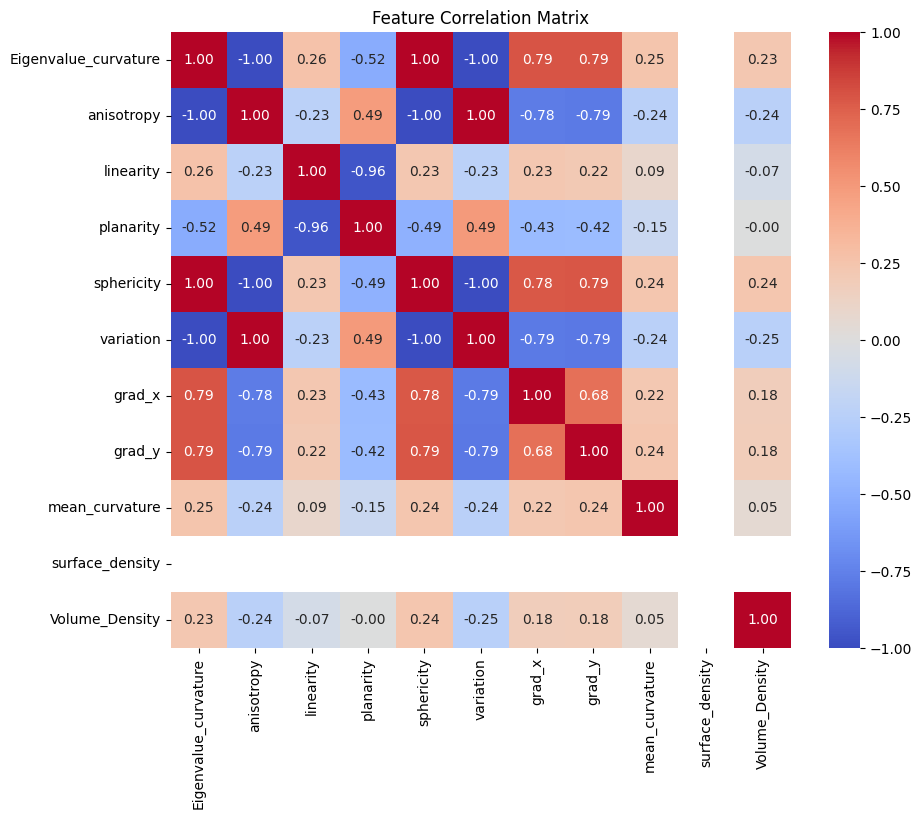

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


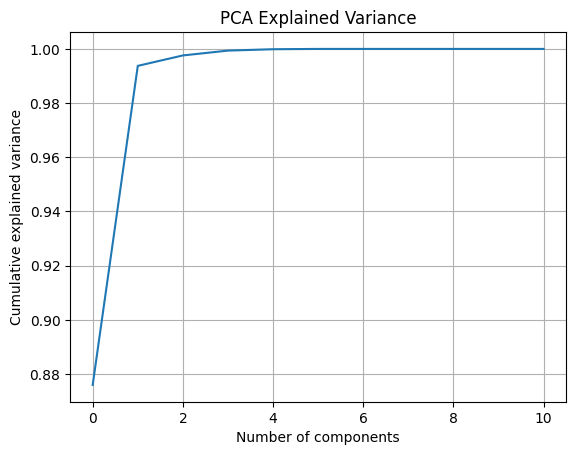

In [5]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
X_pca = pca.fit_transform(features)

# Plot explained variance
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=X_scaled.shape[1])
pca.fit(X_scaled)


PCA(n_components=11)

In [7]:
# Columns = original features, rows = components
loadings = pd.DataFrame(
    np.abs(pca.components_),  # take absolute value to focus on magnitude
    columns=[
        "Eigenvalue_curvature", "anisotropy", "linearity", "planarity", "sphericity",
        "variation", "grad_x", "grad_y", "mean_curvature", "surface_density", "Volume_Density"
    ]
)

# Sum each feature's importance across top 3 PCs
feature_scores = loadings[:3].sum(axis=0)

# Sort features by total contribution
ranked_features = feature_scores.sort_values(ascending=False)
print(ranked_features)


mean_curvature          1.084680e+00
linearity               9.303163e-01
planarity               9.253695e-01
Volume_Density          6.929540e-01
variation               5.625872e-01
sphericity              5.603445e-01
anisotropy              5.603445e-01
Eigenvalue_curvature    5.335576e-01
grad_y                  4.585854e-01
grad_x                  4.183163e-01
surface_density         3.962956e-27
dtype: float64


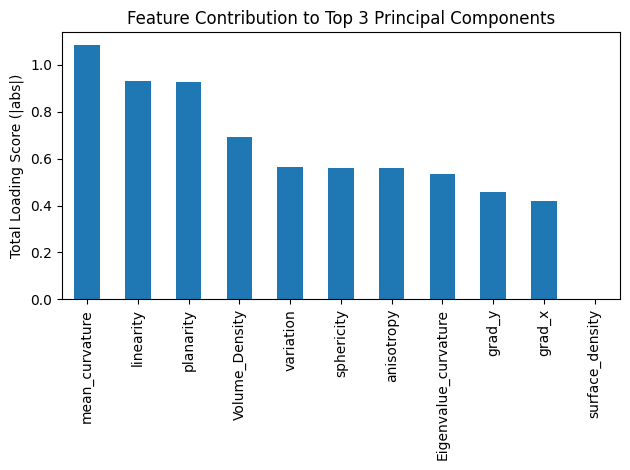

In [8]:
import matplotlib.pyplot as plt

ranked_features.plot(kind="bar", title="Feature Contribution to Top 3 Principal Components")
plt.ylabel("Total Loading Score (|abs|)")
plt.tight_layout()
plt.show()
